In [77]:
## load in csv file
import csv
import pandas as pd
import numpy as np

data = pd.read_csv('animals.csv')
data

,animal,weight,height,inafrica
0,elephant,2000,10.0,1
1,giraffe,1500,20.0,1
2,bear,1500,8.0,0
3,reindeer,800,6.0,0
4,squirrel,3,1.0,0
5,rabbit,2,0.8,0


In [78]:
# convert to array
D = np.array(data.values[:,1:])
print(D)

[[2000 10.0 1]
 [1500 20.0 1]
 [1500 8.0 0]
 [800 6.0 0]
 [3 1.0 0]
 [2 0.8 0]]


In [107]:
# let's use a bigger dataset for the regression
# (this is an example dataset from sklearn datasets)
# the target is the cost of boston house prices
from sklearn.datasets import load_boston
data = load_boston()
print(data['feature_names'])

# I am going to concatenate that
D = np.concatenate((data['data'], data['target'][:,np.newaxis]), axis=-1)

['CRIM' 'ZN' 'INDUS' 'CHAS' 'NOX' 'RM' 'AGE' 'DIS' 'RAD' 'TAX' 'PTRATIO'
 'B' 'LSTAT']


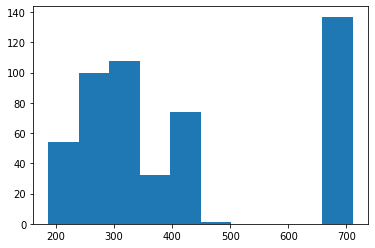

In [143]:
%matplotlib inline
# inspect data distributions
plt.hist(D[:,9])
plt.show()

R^2: 0.661


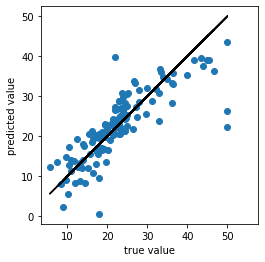

In [145]:
from sklearn.linear_model import LinearRegression, LogisticRegression

# we want to split data into test and train and decide what to predict

pred = 3 # predict if on charles-river (a zero-one variable)
pred = 13 # all other variables are floats

# take X and Y using pred as Y
ndata, nvar = D.shape
notpred = np.ones(nvar, np.bool)
notpred[pred] = 0
X = D[:,notpred]
Y = D[:,pred]

# split data into test and train
test_inds = np.arange(0, ndata, 4, int) # take 1/4 of data as test
train_inds = np.ones(ndata, np.bool)
train_inds[test_inds] = 0

X_train, Y_train = X[train_inds], Y[train_inds]
X_test, Y_test = X[test_inds], Y[test_inds]

if pred==3:
    # logistic regression is for predicting true-false variables
    model = LogisticRegression().fit(X_train, Y_train.astype(np.bool))
    Y_pred = model.predict(X_test)
    
else:
    # linear regression is for predicting float variables
    model = LinearRegression().fit(X_train, Y_train)
    Y_pred = model.predict(X_test)
    plt.scatter(Y_test,Y_pred)
    plt.plot(Y_test,Y_test,'k')
    plt.xlabel('true value')
    plt.ylabel('predicted value')
    plt.axis('square')

# accuracy
# for logistic regression, it's percentage correct
# for linear regression, it's the R^2 score
if pred==3:
    print('accuracy: %2.3f'%model.score(X_test, Y_test))
else:
    print('R^2: %2.3f'%model.score(X_test, Y_test))


In [ ]:
LogisticRegression?